### 1. Setting

In [1]:
# Seed
from numpy.random import seed
seed(1234)
from tensorflow import set_random_seed
set_random_seed(1234)

In [2]:
# Warning Message
import warnings
warnings.filterwarnings(action='ignore') 

### 2. Data Loading

In [3]:
# Original 데이터
import pandas as pd
data_original_2017 = pd.read_csv('./data/original_data_2017.csv')
data_original_2018 = pd.read_csv('./data/original_data_2018.csv')
data_original_2019 = pd.read_csv('./data/original_data_2019.csv')

In [4]:
# 사내 창출 데이터
import pandas as pd
data_new_2017 = pd.read_csv('./data/new_data_2017.csv')
data_new_2018 = pd.read_csv('./data/new_data_2017.csv')
data_new_2019 = pd.read_csv('./data/new_data_2017.csv')

In [5]:
# Unnamed 칼럼 제거
data_original_2017 = data_original_2017[data_original_2017.columns[1:]]
data_new_2017 = data_new_2017[data_new_2017.columns[1:]]

### 3. Data Head

In [6]:
data_original_2017

,date,open,high,low,close,trading_volume,trading_value,code
0,2017-01-02 00:00:00,79905,81585,79170,79800,2730,2.082262e+08,12320
1,2017-01-03 00:00:00,80535,80535,79170,79800,3093,2.353751e+08,12320
2,2017-01-04 00:00:00,80535,80955,76965,77175,2183,1.625183e+08,12320
3,2017-01-05 00:00:00,77070,78855,75600,78225,2560,1.881497e+08,12320
4,2017-01-06 00:00:00,78225,79800,77280,77385,2386,1.782250e+08,12320
...,...,...,...,...,...,...,...,...
587160,2017-12-21 00:00:00,11550,11950,10500,10600,1305109,1.447922e+10,187870
587161,2017-12-22 00:00:00,10300,11250,9650,9960,1040672,1.074168e+10,187870
587162,2017-12-26 00:00:00,10150,10350,9410,9410,481185,4.688869e+09,187870
587163,2017-12-27 00:00:00,9540,11650,9470,9750,5397011,5.784463e+10,187870


In [7]:
data_new_2017

,date,kindex,index,score,probability,code
0,2017-01-02 00:00:00,0.000685,0.388889,0.546392,6.863271,12320
1,2017-01-03 00:00:00,0.000685,0.388889,0.546392,6.863271,12320
2,2017-01-04 00:00:00,0.001262,0.555556,0.974026,3.584906,12320
3,2017-01-05 00:00:00,0.001213,0.625000,0.948718,8.089888,12320
4,2017-01-06 00:00:00,0.001226,0.625000,0.948718,8.089888,12320
...,...,...,...,...,...,...
587160,2017-12-21 00:00:00,0.009434,1.000000,1.000000,30.000000,187870
587161,2017-12-22 00:00:00,0.010040,1.000000,1.000000,30.000000,187870
587162,2017-12-26 00:00:00,0.010627,1.000000,1.000000,30.000000,187870
587163,2017-12-27 00:00:00,0.010256,1.000000,1.000000,30.000000,187870


### 4. Code

In [8]:
CODE_LIST = data_new_2019.code.value_counts().index

### 5. Data Merge & Labeling

In [9]:
stock_data = pd.DataFrame()
df_final = pd.DataFrame()
NUM = 0

for code in CODE_LIST[:] :
    
    # 2017
    data_original = data_original_2017[data_original_2017['code'] == code]
    data_new = data_new_2017[data_new_2017['code'] == code]
    data = pd.merge(data_original, data_new, how='left')
    data = data[['date','trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability', 'close']]
    df_final = df_final.append(data)
    
    # 2018
    data_original = data_original_2018[data_original_2018['code'] == code]
    data_new = data_new_2018[data_new_2018['code'] == code]
    data = pd.merge(data_original, data_new, how='left')
    data = data[['date','trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability', 'close']]
    df_final = df_final.append(data)
    
    # 2019
    data_original = data_original_2019[data_original_2019['code'] == code]
    data_new = data_new_2019[data_new_2019['code'] == code]
    data = pd.merge(data_original, data_new, how='left')
    data = data[['date','trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability', 'close']]
    df_final = df_final.append(data)
    
    # Index Reset
    df_final = df_final.reset_index()
    
    # Data Shfit 생성    
    df_final['close5'] = df_final['close'].shift(-5)
    df_final['pred_rate'] = (100 * (df_final['close5'] - df_final['close'])) / df_final['close']
    df_final = df_final[:-5]

    # 예측값 라벨링
    def labeling(x) : 
        if x >= 15.00 : 
            result = '15 ~ Inf'
        elif x >= 12.00 : 
            result = '12 ~ 15'
        elif x >= 9.00 : 
            result = '9 ~ 12'
        elif x >= 6.00 : 
            result = '6 ~ 9'
        elif x >= 3.00 : 
            result = '3 ~ 6'
        elif x >= 0 : 
            result = '0 ~ 3'
        elif x >= -3.00 : 
            result = '-3 ~ 0'
        elif x >= -6.00 : 
            result = '-6 ~ -3'
        elif x >= -9.00 : 
            result = '-9 ~ -6'
        elif x >= -12.00 : 
            result = '-12 ~ -9'
        elif x >= -15.00 : 
            result = '-15 ~ -12'
        else : 
            result = '-INF ~ -15'
        return result

    # 함수 적용
    df_final['pred_rate_label'] = df_final['pred_rate'].apply(lambda x : labeling(x))
    
    # Feature Selecting
    df_final = df_final[['trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability', 'pred_rate_label']]

    # MinMaxScaling
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(df_final[['trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability']])
    X = scaler.transform(df_final[['trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability']])
    y = df_final[['pred_rate_label']]
    df_final_X = pd.DataFrame(X, columns=['trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability'])
    df_final_y = pd.DataFrame(y, columns=['pred_rate_label'])
    df_final = pd.concat([df_final_X, df_final_y], axis=1)
    
    # 최종 데이터셋에 추가
    stock_data = stock_data.append(df_final)
    
    # df_final Reset
    df_final = pd.DataFrame()
    
    # 경과 check
    if NUM % 100 == 0 : 
        print("{:4}번째 종목 계산 중...." .format(NUM))
    NUM += 1

# 결측값 제거
stock_data = stock_data.dropna(axis=0)

# 최종 데이터 인덱스 리셋
stock_data = stock_data.reset_index()

   0번째 종목 계산 중....
 100번째 종목 계산 중....
 200번째 종목 계산 중....
 300번째 종목 계산 중....
 400번째 종목 계산 중....
 500번째 종목 계산 중....
 600번째 종목 계산 중....
 700번째 종목 계산 중....
 800번째 종목 계산 중....
 900번째 종목 계산 중....
1000번째 종목 계산 중....
1100번째 종목 계산 중....
1200번째 종목 계산 중....
1300번째 종목 계산 중....
1400번째 종목 계산 중....
1500번째 종목 계산 중....
1600번째 종목 계산 중....
1700번째 종목 계산 중....
1800번째 종목 계산 중....
1900번째 종목 계산 중....
2000번째 종목 계산 중....
2100번째 종목 계산 중....
2200번째 종목 계산 중....
2300번째 종목 계산 중....
2400번째 종목 계산 중....
2500번째 종목 계산 중....


In [10]:
stock_data

,level_0,trading_volume,trading_value,kindex,index,score,probability,pred_rate_label
0,0,0.000887,0.000284,0.002800,0.020243,0.002881,0.352102,-3 ~ 0
1,1,0.000965,0.000308,0.002800,0.020243,0.002881,0.352102,-3 ~ 0
2,2,0.001138,0.000362,0.002800,0.020243,0.002881,0.352102,-3 ~ 0
3,3,0.001045,0.000331,0.003382,0.027665,0.003482,0.451567,-3 ~ 0
4,4,0.001190,0.000376,0.005843,0.035088,0.006026,0.534200,-3 ~ 0
...,...,...,...,...,...,...,...,...
1800884,2,0.000000,0.000000,0.576295,0.000000,0.000000,0.000000,-3 ~ 0
1800885,3,0.000101,0.000129,0.000000,0.000000,0.000000,0.000000,-3 ~ 0
1801371,0,0.760873,0.788579,0.000000,0.000000,0.000000,0.000000,15 ~ Inf
1801372,1,0.339865,0.355151,0.827286,1.000000,1.000000,1.000000,-12 ~ -9


In [11]:
stock_data.describe()

,level_0,trading_volume,trading_value,kindex,index,score,probability
count,587075.000000,587075.000000,587075.000000,587075.000000,587075.000000,587075.000000,587075.000000
mean,119.079719,0.044676,0.044539,0.230653,0.195274,0.217463,0.640102
std,70.211398,0.093393,0.094332,0.333281,0.276289,0.329985,0.368791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.003416,0.002757,0.000299,0.017336,0.000238,0.285012
50%,118.000000,0.012344,0.011278,0.001612,0.059075,0.001406,0.875592
75%,180.000000,0.043671,0.043342,0.514467,0.254089,0.467181,0.985024
max,242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
import matplotlib.pyplot as plt
label_count = pd.DataFrame([stock_data.pred_rate_label.value_counts()]).T
label_count['label'] = label_count.index
plt.figure(figsize=(18,6))
import seaborn as sns
sns.set(style = 'whitegrid')
ax = sns.barplot(x='label', y='pred_rate_label', data=label_count)

In [13]:
# Label Setting
def label_to_numeric(x) : 
    if x == '-INF ~ -15' : 
        result = 0
    elif x == '-15 ~ -12' : 
        result = 1
    elif x == '-12 ~ -9' : 
        result = 2
    elif x == '-9 ~ -6' : 
        result = 3
    elif x == '-6 ~ -3' : 
        result = 4
    elif x == '-3 ~ 0' : 
        result = 5
    elif x == '0 ~ 3' : 
        result = 6
    elif x == '3 ~ 6' : 
        result = 7
    elif x == '6 ~ 9' : 
        result = 8
    elif x == '9 ~ 12' : 
        result = 9
    elif x == '12 ~ 15' : 
        result = 10
    else : 
        result = 11
    return result
        
# 함수 적용
stock_data['label'] = stock_data['pred_rate_label'].apply(lambda x : label_to_numeric(x))
stock_data

,level_0,trading_volume,trading_value,kindex,index,score,probability,pred_rate_label,label
0,0,0.000887,0.000284,0.002800,0.020243,0.002881,0.352102,-3 ~ 0,5
1,1,0.000965,0.000308,0.002800,0.020243,0.002881,0.352102,-3 ~ 0,5
2,2,0.001138,0.000362,0.002800,0.020243,0.002881,0.352102,-3 ~ 0,5
3,3,0.001045,0.000331,0.003382,0.027665,0.003482,0.451567,-3 ~ 0,5
4,4,0.001190,0.000376,0.005843,0.035088,0.006026,0.534200,-3 ~ 0,5
...,...,...,...,...,...,...,...,...,...
1800884,2,0.000000,0.000000,0.576295,0.000000,0.000000,0.000000,-3 ~ 0,5
1800885,3,0.000101,0.000129,0.000000,0.000000,0.000000,0.000000,-3 ~ 0,5
1801371,0,0.760873,0.788579,0.000000,0.000000,0.000000,0.000000,15 ~ Inf,11
1801372,1,0.339865,0.355151,0.827286,1.000000,1.000000,1.000000,-12 ~ -9,2


### LightGBM

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = stock_data[['trading_volume', 'trading_value', 'kindex', 'index', 'score', 'probability']].values
y = stock_data[['label']].values
y = y.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1234)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train ,test_size=0.2, random_state=1234)

# HyperParameter
params = {
    'task' : 'train',
    'boosting_type' : 'gbdt',
    'objective' : 'multiclass',
    'metric' : {'multi_logloss'},
    'num_leaves' : 63,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.9,
    'bagging_fraction' : 0.9,
    'bagging_freq': 0,
    'verbose' : 1,
    'num_class' : 12,
    'save_binary' : True
}

# Model Fitting
import lightgbm as lgb
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds = 30)

[1]	valid_0's multi_logloss: 1.80599
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's multi_logloss: 1.79928
[3]	valid_0's multi_logloss: 1.79364
[4]	valid_0's multi_logloss: 1.78838
[5]	valid_0's multi_logloss: 1.78359
[6]	valid_0's multi_logloss: 1.77934
[7]	valid_0's multi_logloss: 1.77574
[8]	valid_0's multi_logloss: 1.77228
[9]	valid_0's multi_logloss: 1.76941
[10]	valid_0's multi_logloss: 1.76671
[11]	valid_0's multi_logloss: 1.76422
[12]	valid_0's multi_logloss: 1.76195
[13]	valid_0's multi_logloss: 1.75959
[14]	valid_0's multi_logloss: 1.75754
[15]	valid_0's multi_logloss: 1.75562
[16]	valid_0's multi_logloss: 1.75376
[17]	valid_0's multi_logloss: 1.75211
[18]	valid_0's multi_logloss: 1.75062
[19]	valid_0's multi_logloss: 1.74921
[20]	valid_0's multi_logloss: 1.74786
[21]	valid_0's multi_logloss: 1.74661
[22]	valid_0's multi_logloss: 1.74541
[23]	valid_0's multi_logloss: 1.74428
[24]	valid_0's multi_logloss: 1.74318
[25]	valid_0's multi_logloss: 1.742

[215]	valid_0's multi_logloss: 1.70862
[216]	valid_0's multi_logloss: 1.70855
[217]	valid_0's multi_logloss: 1.70852
[218]	valid_0's multi_logloss: 1.70842
[219]	valid_0's multi_logloss: 1.70838
[220]	valid_0's multi_logloss: 1.70833
[221]	valid_0's multi_logloss: 1.70823
[222]	valid_0's multi_logloss: 1.70819
[223]	valid_0's multi_logloss: 1.70813
[224]	valid_0's multi_logloss: 1.70805
[225]	valid_0's multi_logloss: 1.70794
[226]	valid_0's multi_logloss: 1.70789
[227]	valid_0's multi_logloss: 1.70783
[228]	valid_0's multi_logloss: 1.70779
[229]	valid_0's multi_logloss: 1.70775
[230]	valid_0's multi_logloss: 1.70768
[231]	valid_0's multi_logloss: 1.70763
[232]	valid_0's multi_logloss: 1.70756
[233]	valid_0's multi_logloss: 1.70749
[234]	valid_0's multi_logloss: 1.70745
[235]	valid_0's multi_logloss: 1.70736
[236]	valid_0's multi_logloss: 1.70732
[237]	valid_0's multi_logloss: 1.70728
[238]	valid_0's multi_logloss: 1.70725
[239]	valid_0's multi_logloss: 1.70718
[240]	valid_0's multi_log

[426]	valid_0's multi_logloss: 1.70195
[427]	valid_0's multi_logloss: 1.70194
[428]	valid_0's multi_logloss: 1.70192
[429]	valid_0's multi_logloss: 1.7019
[430]	valid_0's multi_logloss: 1.70185
[431]	valid_0's multi_logloss: 1.70184
[432]	valid_0's multi_logloss: 1.70183
[433]	valid_0's multi_logloss: 1.70181
[434]	valid_0's multi_logloss: 1.7018
[435]	valid_0's multi_logloss: 1.70174
[436]	valid_0's multi_logloss: 1.7017
[437]	valid_0's multi_logloss: 1.70165
[438]	valid_0's multi_logloss: 1.70164
[439]	valid_0's multi_logloss: 1.70166
[440]	valid_0's multi_logloss: 1.70164
[441]	valid_0's multi_logloss: 1.70158
[442]	valid_0's multi_logloss: 1.70161
[443]	valid_0's multi_logloss: 1.7016
[444]	valid_0's multi_logloss: 1.70153
[445]	valid_0's multi_logloss: 1.70152
[446]	valid_0's multi_logloss: 1.70151
[447]	valid_0's multi_logloss: 1.70152
[448]	valid_0's multi_logloss: 1.70149
[449]	valid_0's multi_logloss: 1.70148
[450]	valid_0's multi_logloss: 1.70148
[451]	valid_0's multi_logloss

[637]	valid_0's multi_logloss: 1.6994
[638]	valid_0's multi_logloss: 1.69937
[639]	valid_0's multi_logloss: 1.69934
[640]	valid_0's multi_logloss: 1.69932
[641]	valid_0's multi_logloss: 1.69933
[642]	valid_0's multi_logloss: 1.69932
[643]	valid_0's multi_logloss: 1.69928
[644]	valid_0's multi_logloss: 1.69927
[645]	valid_0's multi_logloss: 1.69927
[646]	valid_0's multi_logloss: 1.69924
[647]	valid_0's multi_logloss: 1.69922
[648]	valid_0's multi_logloss: 1.69925
[649]	valid_0's multi_logloss: 1.69924
[650]	valid_0's multi_logloss: 1.69923
[651]	valid_0's multi_logloss: 1.69922
[652]	valid_0's multi_logloss: 1.6992
[653]	valid_0's multi_logloss: 1.69918
[654]	valid_0's multi_logloss: 1.6992
[655]	valid_0's multi_logloss: 1.6992
[656]	valid_0's multi_logloss: 1.69922
[657]	valid_0's multi_logloss: 1.69922
[658]	valid_0's multi_logloss: 1.69921
[659]	valid_0's multi_logloss: 1.6992
[660]	valid_0's multi_logloss: 1.69916
[661]	valid_0's multi_logloss: 1.69914
[662]	valid_0's multi_logloss:

### Prediction

In [19]:
predictions = []
import numpy as np
for x in gbm.predict(x_train):
    predictions.append(np.argmax(x))

y_train_pred = np.array(predictions).reshape(-1)
y_train_true = y_train

from sklearn.metrics import confusion_matrix
print("== Train Obs ==")
print('{:,} obs' .format(len(x_train)), end="\n\n")
print("== Train Error Matrix ==")
print(confusion_matrix(y_train_true, y_train_pred), end="\n\n")
print("== Train Accuracy ==")
acc = (2583 + 2102 + 2069 + 2691 + 6916 + 86812 + 89645 + 2687 + 1425 + 1537 + 1694 + 2590) / len(y_train)
print("train accuracy : {:.2f}%" .format(acc * 100))

== Train Obs ==
422,693 obs

== Train Error Matrix ==
[[ 2583     7     4     3    34   363   229     1     0     0     0     4]
 [   11  2102    10     5    38   607   295     2     0     0     0     1]
 [   34    11  2069    54   222  3241  1596     9     2     1     1    12]
 [   32     9    30  2691   613 10361  5343    55     8     6     2    21]
 [   47     8    27   132  6916 29070 16141   101    12     8     5    32]
 [   53     9    33   102   831 86812 37870   123    10     8     7    40]
 [   46    14    20    79   776 40697 89645   156    17    11     2    50]
 [   30     5    26    69   513 21019 19253  2687    28     7     3    42]
 [   24     6    10    45   257  8374  6924    76  1425    17     3    19]
 [   12     1     5    12   119  3403  2763    28     9  1537     4    13]
 [    5     0     3     1    37  1311   999     9     1     5  1694     9]
 [    7     7     0    16   103  2588  1882    13     3     3     7  2590]]

== Train Accuracy ==
train accuracy : 47.97%

In [20]:
predictions = []
for x in gbm.predict(x_valid):
    predictions.append(np.argmax(x))

y_valid_pred = np.array(predictions).reshape(-1)
y_valid_true = y_valid

from sklearn.metrics import confusion_matrix
print("== Valid Obs ==")
print('{:,} obs' .format(len(x_valid)), end="\n\n")
print("== Valid Error Matrix ==")
print(confusion_matrix(y_valid_true, y_valid_pred), end="\n\n")
print("== Valid Accuracy ==")
acc = (111 + 15 + 33 + 79 + 518 + 17318 + 17810 + 106 + 22 + 7 + 5 + 95) / len(y_valid)
print("valid accuracy : {:.2f}%" .format(acc * 100))

== Valid Obs ==
105,674 obs

== Valid Error Matrix ==
[[  111    11    22    22    77   351   199     5     3     2     0    14]
 [   26    15    14    18    56   395   198     9     0     1     1    10]
 [   38    14    33    54   113  1027   537    12     4     0     0    12]
 [   33    10    39    79   270  2814  1498    38     7     5     2    25]
 [   32    12    19    86   518  8017  4453    43     6     7     6    27]
 [   36    20    28    77   525 17318 13385    92    19    15    12    43]
 [   34    12    21    59   394 14125 17810   123    32     7    10    45]
 [   12     6     9    26   209  5456  4992   106    25     9     9    32]
 [    9     6    11    15   109  2207  1884    38    22    11     5    18]
 [    7     6     5    11    56   999   795    19     7     7     8    15]
 [    4     0     3    11    29   526   377    14     2     5     5    13]
 [   15     4     4    26    65   883   696    23     2    11     8    95]]

== Valid Accuracy ==
valid accuracy : 34.18%

In [46]:
predictions = []
for x in gbm.predict(x_test):
    predictions.append(np.argmax(x))

y_test_pred = np.array(predictions).reshape(-1)
y_test_true = y_test

from sklearn.metrics import confusion_matrix
print("== Test Obs ==")
print('{:,} obs' .format(len(x_test)), end="\n\n")
print("== Test Error Matrix ==")
print(confusion_matrix(y_test_true, y_test_pred), end="\n\n")
print("== Test Accuracy ==")
acc = (62 + 4 + 12 + 41 + 264 + 9688 + 9989 + 65 + 16 + 7 + 2 + 50) / len(y_test)
print("test accuracy : {:.2f}%" .format(acc * 100))
adj_acc = (26 + 7 + 17 + 51 + 298 + 9688 + 7465 + 58 + 9 + 11 + 10 + 22) / 58708
print("test adjust accuracy : {:.2f}%" .format((acc - adj_acc) * 100))

== Test Obs ==
58,708 obs

== Test Error Matrix ==
[[  62    7   17   15   35  185   99    1    1    0    0    1]
 [  15    4   10   11   37  237  121    1    1    0    0    2]
 [  14   10   12   29   69  538  286   11    0    1    0    5]
 [  21   14   19   41  153 1575  772   13    4    4    3    7]
 [  21    6   14   60  264 4265 2464   25    6    1    1   16]
 [  26    7   17   51  298 9688 7465   58    9   11   10   22]
 [  19   10   10   37  197 7912 9989   81   17    8    6   12]
 [  10    4    6   17  111 2949 2853   65    8   11    6   20]
 [   5    4    7   13   55 1238 1025   28   16    8    1   11]
 [   2    1    2    7   32  591  504    5    7    7    7    6]
 [   3    2    1    5    6  256  213    6    1    1    2    7]
 [   6    3    1   12   32  513  362   11    3    1    3   50]]

== Test Accuracy ==
test accuracy : 34.41%
test adjust accuracy : 4.32%


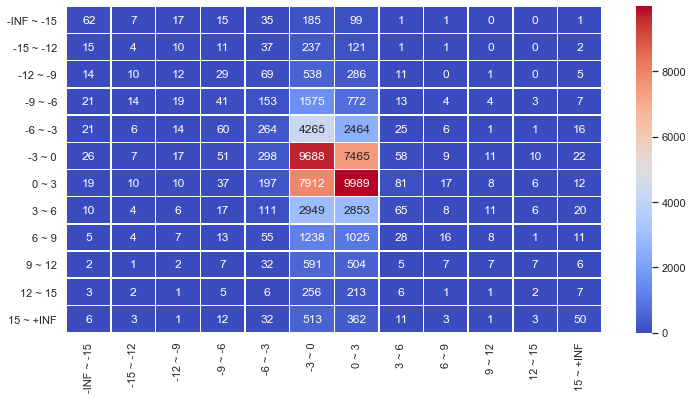

In [34]:
heatmap =pd.DataFrame(confusion_matrix(y_test_true, y_test_pred),
                      columns=['-INF ~ -15', '-15 ~ -12', '-12 ~ -9', '-9 ~ -6', '-6 ~ -3', '-3 ~ 0',\
                               '0 ~ 3', '3 ~ 6', '6 ~ 9', '9 ~ 12', '12 ~ 15', '15 ~ +INF'],
                      index=['-INF ~ -15', '-15 ~ -12', '-12 ~ -9', '-9 ~ -6', '-6 ~ -3', '-3 ~ 0',\
                               '0 ~ 3', '3 ~ 6', '6 ~ 9', '9 ~ 12', '12 ~ 15', '15 ~ +INF'])
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12,6))
map = sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='coolwarm')
map.set_ylim(12,0)
plt.show()

### Test 상승, 하락, 2 Class로만 분류한 경우

In [49]:
Class3 = np.array([[62+7+17+15+35+185+15+4+10+11+37+237+14+10+12+29+69+538+21+14+19+41+153+1575+21+6+14+60+264+4265+26+7+17+51+298+9688,\
                    99+1+1+0+0+1+121+1+1+0+0+2+286+11+0+1+0+5+772+13+4+4+3+7+2464+25+6+1+1+16+7465+58+9+11+10+22],
                   [19+10+10+37+197+7912+10+4+6+17+111+2949+5+4+7+13+55+1238+2+1+2+7+32+591+3+2+1+5+6+256+6+3+1+12+32,\
                    9989+81+17+8+6+12+2853+65+8+11+6+20+1025+28+16+8+1+11+504+5+7+7+7+6+213+6+1+1+2+7+362+11+3+1+3+50]])

print("== Up and Down ==")
print(Class3, end="\n\n")

acc = (17847 + 15361) / (17847 + 11421 + 13566 + 15361)
print("Test 3 Class Accuracy = {:.2f}%". format(acc*100))

adj_acc = (17847 + 11421) / 58708
print("test adjust accuracy : {:.2f}%" .format((acc - adj_acc) * 100))

== Up and Down ==
[[17847 11421]
 [13566 15361]]

Test 3 Class Accuracy = 57.06%
test adjust accuracy : 7.21%


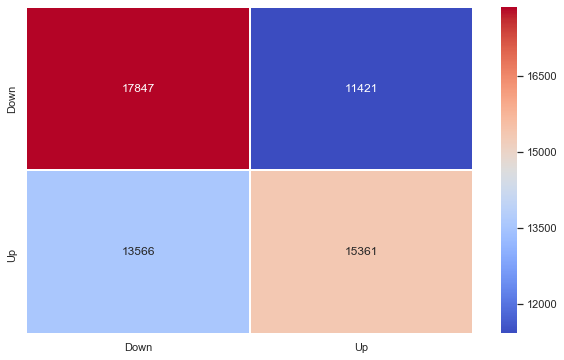

In [50]:
heatmap =pd.DataFrame(Class3,
                      columns=['Down', 'Up'],
                      index = ['Down', 'Up'])

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10,6))
map = sns.heatmap(heatmap, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='coolwarm')
map.set_ylim(2,0)
plt.show()